In [13]:
madelon_param <- read.csv('https://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon.param', header = FALSE)
madelon_param

V1
Data type: non-sparse
Number of features: 500
Number of examples and check-sums:
Pos_ex Neg_ex Tot_ex Check_sum
Train 1000 1000 2000 488083511.00
Valid 300 300 600 146395833.00
Test 900 900 1800 439209553.00
All 2200 2200 4400 1073688897.00


In [3]:
library(tidyverse)
library(ggplot2)
install.packages("pryr", repos = "http://cran.us.r-project.org")
library(pryr)


Loading tidyverse: ggplot2
Loading tidyverse: tibble
Loading tidyverse: tidyr
Loading tidyverse: readr
Loading tidyverse: purrr
Loading tidyverse: dplyr
Conflicts with tidy packages ---------------------------------------------------
filter(): dplyr, stats
lag():    dplyr, stats
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done

Attaching package: ‘pryr’

The following objects are masked from ‘package:purrr’:

    compose, partial



V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
485,477,537,479,452,471,491,476,475,473,⋯,477,481,477,485,511,485,481,479,475,496
483,458,460,487,587,475,526,479,485,469,⋯,463,478,487,338,513,486,483,492,510,517
487,542,499,468,448,471,442,478,480,477,⋯,487,481,492,650,506,501,480,489,499,498
480,491,510,485,495,472,417,474,502,476,⋯,491,480,474,572,454,469,475,482,494,461
484,502,528,489,466,481,402,478,487,468,⋯,488,479,452,435,486,508,481,504,495,511
481,496,451,480,516,484,484,476,500,482,⋯,478,481,477,435,491,564,482,463,457,500


4.05 MB

[1] 0

The sum of Madelon_Training set is  488083511

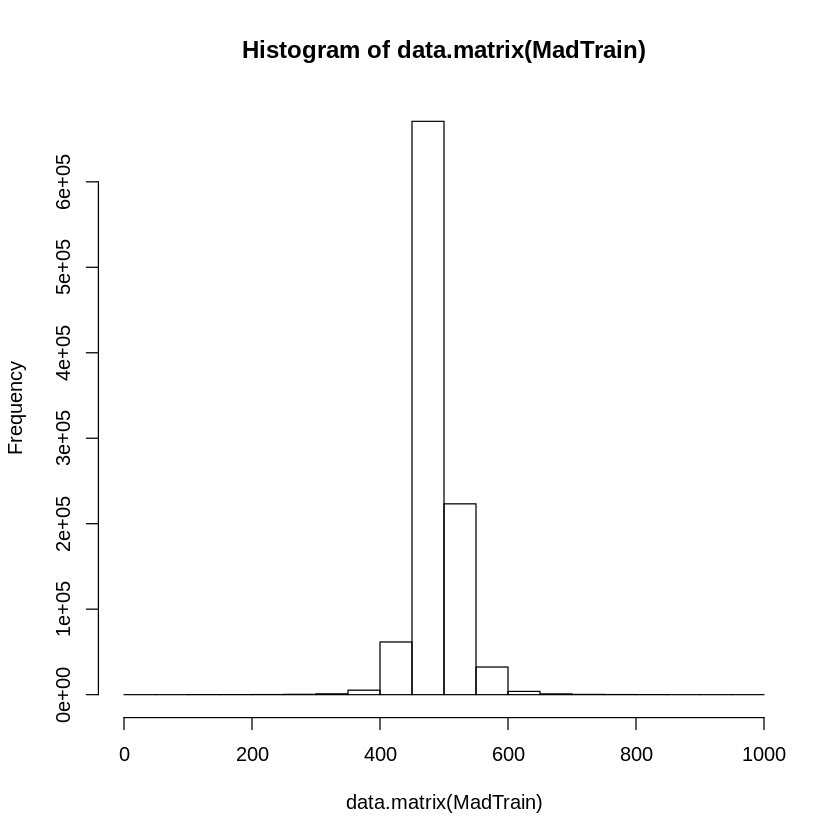

In [14]:
#For the Training Data Set
MadTrainURL <- "http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.data"
MadTrain <- read.csv(url(MadTrainURL), sep = "", header = FALSE)
head(MadTrain)
object_size(MadTrain)
sum(is.na(MadTrain))
hist(data.matrix(MadTrain))
cat('The sum of Madelon_Training set is ', sum(MadTrain))

V1
-1
-1
-1
1
1
1


8.67 kB

[1] 0

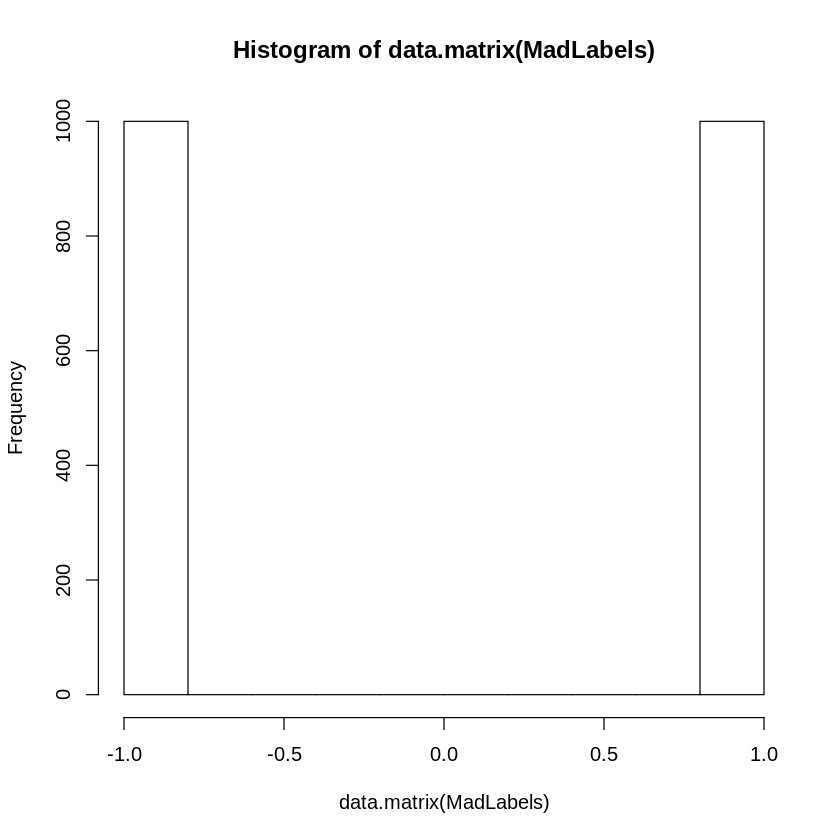

In [10]:
#For the Training Labels Set
MadLabelsURL <- "http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_train.labels"
MadLabels <- read.csv(url(MadLabelsURL), sep = "", header = FALSE)
head(MadLabels)
object_size(MadLabels)
sum(is.na(MadLabels))
hist(data.matrix(MadLabels))

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
483,454,513,495,523,469,453,477,506,479,⋯,455,480,543,259,413,520,485,498,523,510
485,508,493,487,478,472,504,476,479,475,⋯,486,480,535,534,514,452,484,495,548,477
483,521,507,475,493,486,421,475,496,483,⋯,491,476,498,495,508,528,486,465,508,503
474,504,576,480,553,483,524,478,483,483,⋯,521,475,470,463,509,525,479,467,552,517
495,474,523,479,495,488,485,476,497,478,⋯,510,471,522,343,509,520,475,493,506,491
474,507,504,495,428,490,498,478,511,482,⋯,487,476,492,503,410,573,477,461,532,520


1.25 MB

[1] 0

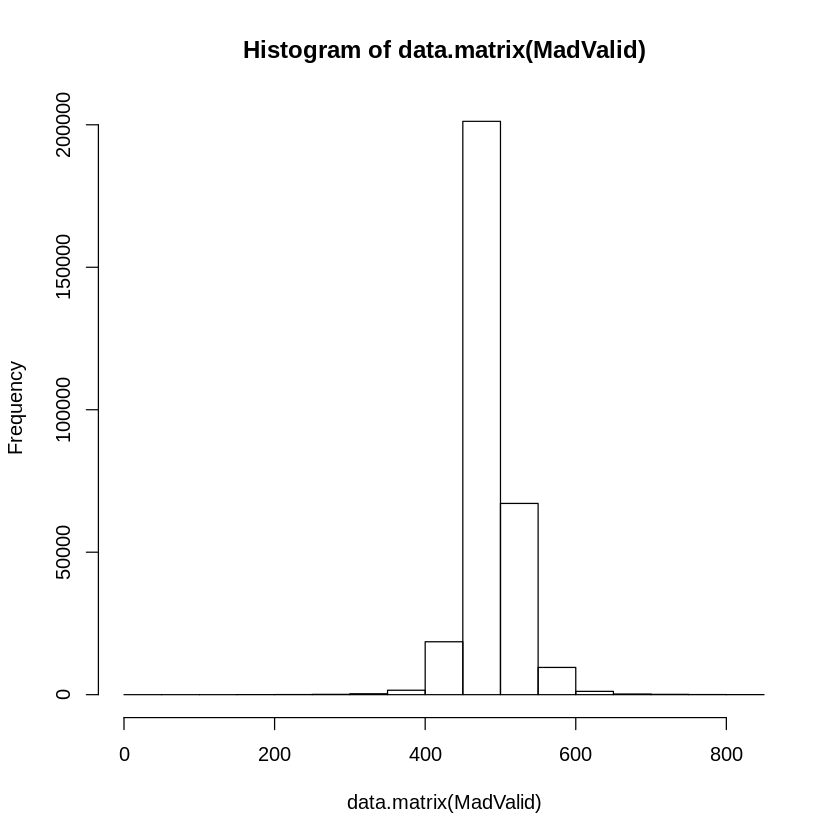

In [9]:
#For the Validation Data Set
MadValidURL <- "http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_valid.data"
MadValid <- read.csv(url(MadValidURL), sep = "", header = FALSE)
head(MadValid)
object_size(MadValid)
sum(is.na(MadValid))
hist(data.matrix(MadValid))



V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,⋯,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
483,460,559,477,462,491,499,475,495,479,⋯,470,480,546,630,434,497,479,503,465,494
484,509,538,473,548,497,551,477,498,471,⋯,474,482,493,442,440,587,475,483,509,455
476,529,558,477,505,486,545,477,473,480,⋯,501,482,465,389,460,459,484,476,564,521
487,475,480,494,477,472,512,477,486,480,⋯,470,476,536,622,523,445,481,490,481,548
486,490,480,471,520,481,437,476,484,482,⋯,458,473,474,491,516,515,475,497,453,497
481,465,520,478,532,472,506,476,498,488,⋯,497,483,486,706,533,536,474,490,563,525


3.65 MB

[1] 0

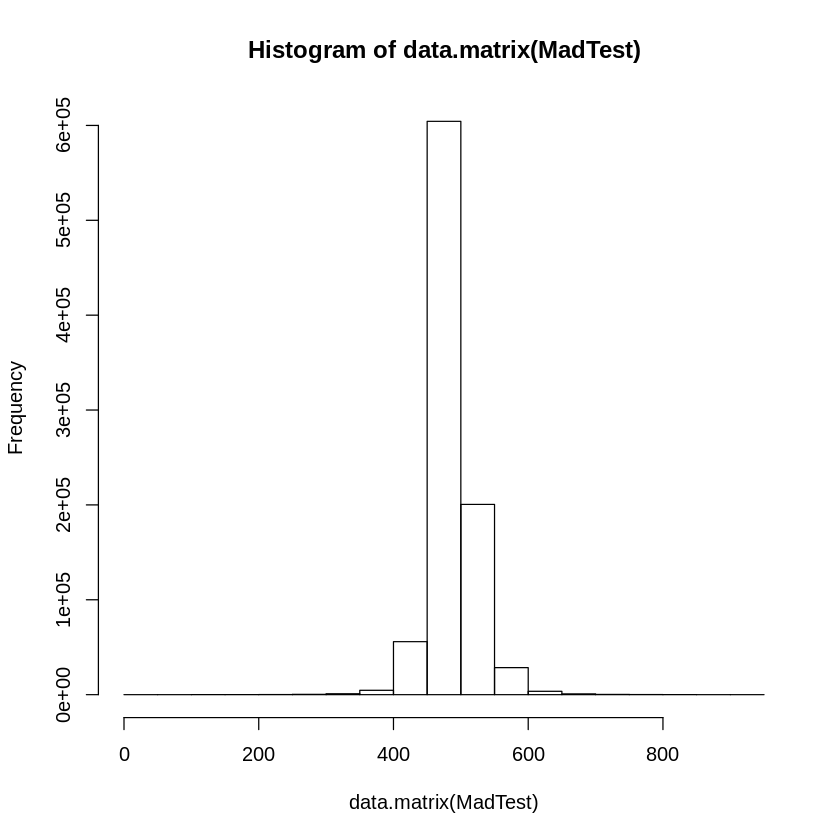

In [8]:
#For the Testing Data Set
MadTestURL <- "http://archive.ics.uci.edu/ml/machine-learning-databases/madelon/MADELON/madelon_test.data"
MadTest <- read.csv(url(MadTestURL), sep = "", header = FALSE)
head(MadTest)
object_size(MadTest)
sum(is.na(MadTest))
hist(data.matrix(MadTest))